# Multiple Linear Regression Model to Predict Housing Prices

**Mauricio Ferragut**



# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This multiple linear regression project aimed to predict housing sales prices using 11 independent variables, selected based on their correlation to sale price from a dataset with 82 columns. Categorical independent variables were transformed into usable data through one-hot encoding. The analysis resulted in an R^2 of 0.88 on the training data and 0.86 on the test data, indicating a strong fit and a good ability to predict housing sales prices. The 11 independent variables used in the model were found to have significant impact on the predicted outcome.

[Back to top](#Index)


## 1. Introduction

This multiple linear regression project aims to predict housing sales prices using 11 independent variables selected from a dataset with 82 columns based on their correlation to sale price. The dataset was cleaned by removing columns and rows with null values to ensure the accuracy of the analysis.

The sales price data was log-normally distributed, so it was log-transformed to meet the assumptions of linear regression. Categorical independent variables were transformed into usable data through one-hot encoding, allowing them to be included in the analysis.

The correlation coefficient was calculated for each independent variable in relation to the sales price, and those with the strongest correlations were selected for inclusion in the model. Eleven independent variables were ultimately chosen, and their impact on the predicted outcome was found to be significant.

The model follows the equation 

$Y = X_1ß_1 + X_2ß_2 + X_3ß_3...$

Where $Y$ is house sale price, the $X$'s are independent variables, and $ß$'s are correlation weights which we will calculate.


[Back to top](#Index)

## 2. The Data

[Back to top](#Index)

### 2.1 Import the Data

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

#import data
data = pd.read_csv("C:/Users/mauri/Documents/Python Scripts/houseSmallData.csv")
data.shape #100 rows, 82 columns

(100, 82)

In [2]:
train = data.iloc[:,:] #copy of data for model training purposes
train.shape #(100 rows, 82 columns)
train.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Take a look at sale price data
salePrice = train['SalePrice']
salePrice.describe()

count       100.000000
mean     173820.660000
std       72236.552886
min       40000.000000
25%      129362.500000
50%      153750.000000
75%      207750.000000
max      438780.000000
Name: SalePrice, dtype: float64

[Back to top](#Index)

### 2.2 Data Exploration

Create graphs displaying the relationships between the variables that you consider most important to solve the problem of predicting housing prices.


Include a description of the results displayed by each *plot*.

Text(0.5, 1.0, 'Histogram of Sale Price')

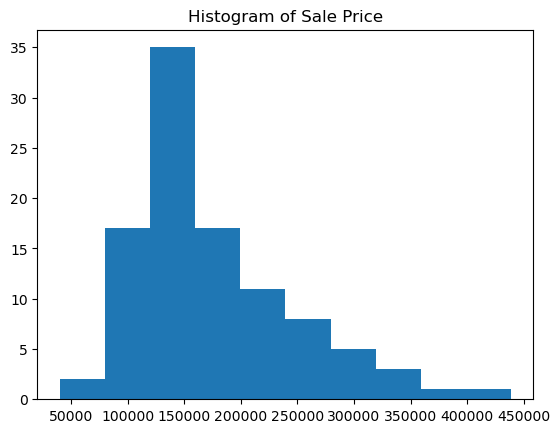

In [39]:
#Plot histogram of sale price data
plt.hist(salePrice)
plt.title('Histogram of Sale Price')

### Sale price data does not appear normally distributed <a class = 'anchor' id = "logtransform"></a>
Looks like it could be log-normally distributed, so we can try transforming it. 

Text(0.5, 1.0, 'Histogram of log(Sale Price)')

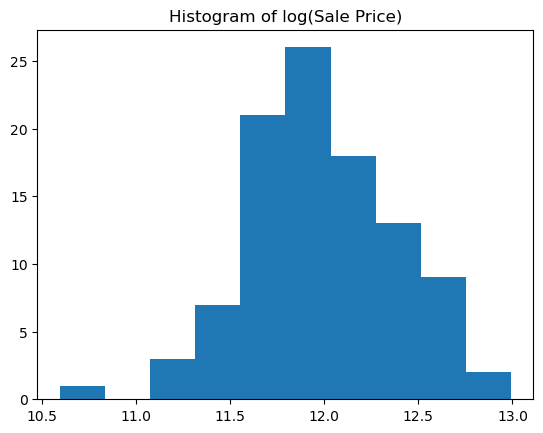

In [40]:
#Reshape data using log transform
target = np.log(salePrice)
plt.hist(target)
plt.title('Histogram of log(Sale Price)')

### The log-transformed sale price data looks much closer to a normal distribution
This can be used as long as we remember that we are now predicting the logarithm of the sale price, and need to transform it back to sale price when predicting sale prices.

### An analysis of skew supports our decision to use the log-transformed data for our model

In [6]:
#compare skew of sale price data and log-transformed sale price data
salePrice.skew()     #skew of 1.178, which is significant
target.skew()        #skew of -0.096, which is reduced significantly

-0.09632240207755555

### Plot log-transformed sale price against some independent variables

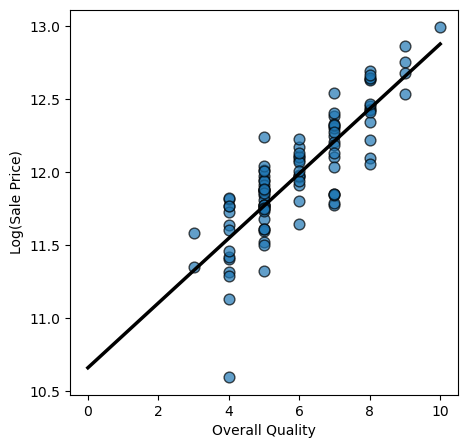

In [7]:
# Initialize layout
fig, ax = plt.subplots(figsize = (5, 5))

# Add scatterplot
ax.scatter(train['OverallQual'], y=target, s=60, alpha=0.7, edgecolors="k")
plt.xlabel('Overall Quality')
plt.ylabel('Log(Sale Price)')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(train['OverallQual'], y=target, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 10, num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5);


### OverallQual, a rating of the overall material and finish of the house, seems very well postively correlated with log(sale price).

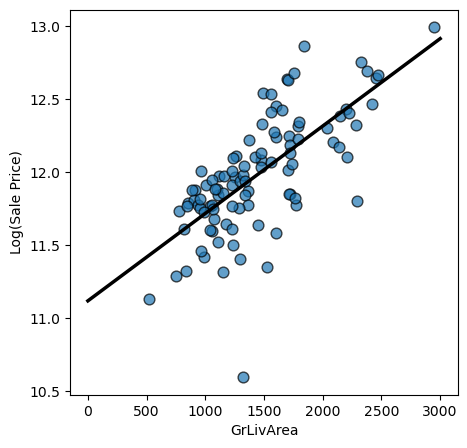

In [8]:
fig, ax = plt.subplots(figsize = (5, 5))

ax.scatter(train['GrLivArea'], y=target, s=60, alpha=0.7, edgecolors="k")
plt.xlabel('GrLivArea')
plt.ylabel('Log(Sale Price)')

b, a = np.polyfit(train['GrLivArea'], y=target, deg=1)

xseq = np.linspace(0, 3000, num=100)

ax.plot(xseq, a + b * xseq, color="k", lw=2.5);

### GrLivingArea, above ground living area in sqft, seems very well positively correlated with log(sale price).

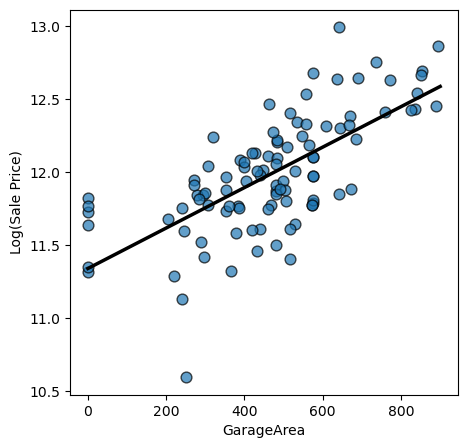

In [9]:
fig, ax = plt.subplots(figsize = (5, 5))

ax.scatter(train['GarageArea'], y=target, s=60, alpha=0.7, edgecolors="k")
plt.xlabel('GarageArea')
plt.ylabel('Log(Sale Price)')

b, a = np.polyfit(train['GarageArea'], y=target, deg=1)

xseq = np.linspace(0, 900, num=100)

ax.plot(xseq, a + b * xseq, color="k", lw=2.5);

### GarageArea, the size of the garage in sqft, seems fairly well positively correlated with log(sale price).

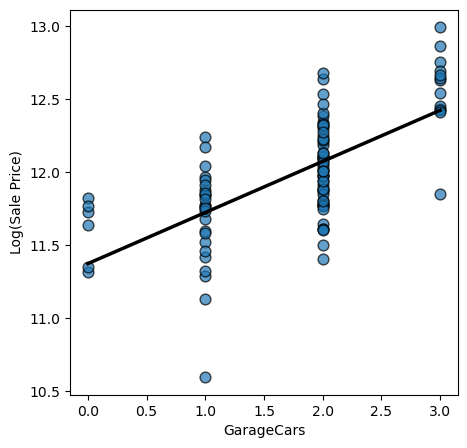

In [10]:
fig, ax = plt.subplots(figsize = (5, 5))

ax.scatter(train['GarageCars'], y=target, s=60, alpha=0.7, edgecolors="k")
plt.xlabel('GarageCars')
plt.ylabel('Log(Sale Price)')

b, a = np.polyfit(train['GarageCars'], y=target, deg=1)

xseq = np.linspace(0, 3, num=100)

ax.plot(xseq, a + b * xseq, color="k", lw=2.5);

### GarageCars, the size of the garage in car capacity, seems fairly well positively correlated with log(sale price).

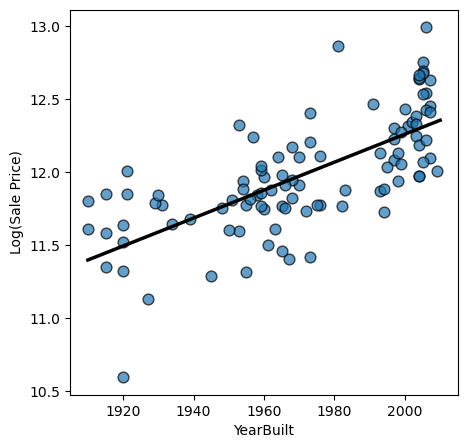

In [11]:
fig, ax = plt.subplots(figsize = (5, 5))

ax.scatter(train['YearBuilt'], y=target, s=60, alpha=0.7, edgecolors="k")
plt.xlabel('YearBuilt')
plt.ylabel('Log(Sale Price)')

b, a = np.polyfit(train['YearBuilt'], y=target, deg=1)

xseq = np.linspace(1910, 2010, num=100)

ax.plot(xseq, a + b * xseq, color="k", lw=2.5);

### YearBuilt, the year in which the house was built, has a positive correlation with log(sale price).

[Back to top](#Index)

### 2.3 Data Preparation



### The sale price data needed to be reshaped. See [log-transformation](#logtransform) of the data above.

### Cleaning the data:
### First we drop all columns with excessive (more than 10) nulls

In [12]:
#Look at null data across dataframe

nulls = train.isnull().sum()

drop_cols = []
counter = 0
#iterate over nulls
for i in nulls:
    if i > 10:
        drop_cols.append(nulls.index[counter]) #append col names where there are >10 null values to drop_cols list
    counter += 1
#iterate over drop_cols list
for col in drop_cols:
    train.drop(col, axis = 1, inplace=True) #drop columns

#check that columns got dropped
train.isnull().sum()

Unnamed: 0       0
Id               0
MSSubClass       0
MSZoning         0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

### Now we query for rows without nulls to remove any remaining null data

In [13]:
#Now we get rid of rows with NaN

drop_rows = []
counter = 0    
for i in nulls:
    if i > 0 and i <=10:
        drop_rows.append(nulls.index[counter]) #append col names where there are between 1 and 10 null values to drop_rows list
    counter += 1 

#reassign train, only including rows without null values
for row in drop_rows:
    train = train[train[row].notna()]

In [14]:
train.shape

(92, 76)

### Our cleaned data now has 92 rows and 76 columns

### Make categorical data usable through one-hot encoding

In [15]:
#create function that will automate one-hot encoding of each categorical column
def one_hot_encode(df, column):
    one_hot = pd.get_dummies(df[column], prefix=column)  #convert categorical variables into dummy variables
    df = df.join(one_hot)                 #join dummy variable columns to dataframe
    df.drop(column, axis=1, inplace=True) #drop the original categorical column
    return df

In [16]:
#select only categorical data
categorical = train.select_dtypes(include=[object])

#make a list of categorical column names
categorical_cols = list(categorical.columns)
# categorical_cols

In [17]:
#iterate over list of categorical columns, feed into one-hot encoding function
for col in categorical_cols:
    categorical = one_hot_encode(categorical, col)
      
categorical
#one-hot encoding has now turned categorical columns into usable numerical columns

,MSZoning_C (all),MSZoning_FV,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_Bnk,...,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
1,0,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
2,0,0,1,0,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,0,0,1,0,0,1,1,0,0,0,...,1,0,0,1,0,0,1,1,0,0
4,0,0,1,0,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0,0,1,0,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
95,0,0,1,0,0,1,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
96,0,0,1,0,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
97,0,0,1,0,0,1,0,0,1,0,...,1,0,1,0,0,0,1,0,1,0


### Now we have our usable categorical data, let's get our numerical data

In [18]:
#Get numerical data
numeric = train.select_dtypes(include=[np.number]) #select only numerical datatypes
numeric.head()

,Unnamed: 0,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,1,60,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,1,2,20,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,2,3,60,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,3,4,70,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,4,5,60,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


### Now we join our numerical and categorical data into one dataframe

In [19]:
data_clean = numeric.join(categorical)
data_clean.shape #92 rows, 204 columns

(92, 204)

[Back to top](#Index)

### 2.4 Correlation

Describe the correlation between the variables in your data. How can the correlation help you make an educated guess about how to proceed with your analysis? Will you explore different variables based on the correlation you found? If so, describe what you did and be sure to include what you found with the new set of variables.

In [20]:
#Find correlation
corr = data_clean.corr()
corr

,Unnamed: 0,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
Unnamed: 0,1.000000,1.000000,0.137568,-0.032999,-0.158653,-0.106961,-0.064661,0.010131,0.043640,-0.116994,...,0.062291,-0.068085,0.111210,-0.018197,0.121858,-0.059135,-0.023705,-0.040817,0.072351,-0.059135
Id,1.000000,1.000000,0.137568,-0.032999,-0.158653,-0.106961,-0.064661,0.010131,0.043640,-0.116994,...,0.062291,-0.068085,0.111210,-0.018197,0.121858,-0.059135,-0.023705,-0.040817,0.072351,-0.059135
MSSubClass,0.137568,0.137568,1.000000,-0.330912,0.122743,-0.103423,0.013859,0.065691,0.026036,-0.033935,...,-0.099499,0.058658,-0.111041,0.025474,-0.121727,0.084389,0.002637,-0.011624,-0.047057,0.084389
LotArea,-0.032999,-0.032999,-0.330912,1.000000,0.328167,-0.171639,0.164696,0.120368,0.077315,0.347003,...,0.041089,-0.089887,0.102902,0.004228,-0.044116,0.048367,-0.013824,-0.126699,0.069564,0.048367
OverallQual,-0.158653,-0.158653,0.122743,0.328167,1.000000,-0.334532,0.571356,0.498736,0.514169,0.070283,...,0.171362,-0.105295,-0.171362,0.192725,-0.147597,0.274525,-0.139922,-0.011821,-0.173986,0.274525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleType_New,-0.059135,-0.059135,0.084389,0.048367,0.274525,-0.162704,0.298245,0.273308,0.259215,-0.090163,...,0.039375,-0.048494,-0.039375,0.063322,-0.048494,1.000000,-0.802129,-0.086978,-0.598448,1.000000
SaleType_WD,-0.023705,-0.023705,0.002637,-0.013824,-0.139922,0.163718,-0.146182,-0.086735,-0.160033,0.140602,...,-0.049088,0.060457,0.049088,-0.078942,-0.557549,-0.802129,1.000000,-0.137885,0.647028,-0.802129
SaleCondition_Abnorml,-0.040817,-0.040817,-0.011624,-0.126699,-0.011821,-0.163718,-0.190697,-0.163731,-0.072046,0.036945,...,0.049088,-0.060457,-0.049088,0.078942,0.351547,-0.086978,-0.137885,1.000000,-0.746074,-0.086978
SaleCondition_Normal,0.072351,0.072351,-0.047057,0.069564,-0.173986,0.240414,-0.045985,-0.051004,-0.115318,0.030553,...,-0.065795,0.081034,0.065795,-0.105810,-0.250304,-0.598448,0.647028,-0.746074,1.000000,-0.598448


#### Above, the correlation table shows each column's correlation to every other column

In [21]:
#Find correlation to sale price and sort by descending order
corr_to_sp = corr['SalePrice'].sort_values(ascending=False)
print(corr_to_sp.to_string())

SalePrice                1.000000
OverallQual              0.850038
GrLivArea                0.749828
GarageArea               0.720302
GarageCars               0.693404
BsmtQual_Ex              0.680761
YearBuilt                0.656909
TotalBsmtSF              0.626953
FullBath                 0.621826
GarageYrBlt              0.599547
1stFlrSF                 0.585639
TotRmsAbvGrd             0.582499
MasVnrArea               0.556328
YearRemodAdd             0.550558
Neighborhood_NridgHt     0.530258
Foundation_PConc         0.526124
ExterQual_Gd             0.516535
KitchenQual_Gd           0.493917
LotArea                  0.490048
HeatingQC_Ex             0.472751
Fireplaces               0.452634
WoodDeckSF               0.448247
ExterQual_Ex             0.445484
MSZoning_RL              0.400962
Exterior2nd_VinylSd      0.398022
Exterior1st_VinylSd      0.398022
MasVnrType_Stone         0.397813
GarageFinish_RFn         0.396529
SaleType_New             0.387870
SaleCondition_

#### Above, every column's correlation to Sale Price is listed. 
We must decide which ones to include in our mutiple linear regression. Rather than only the variables we had plotted previously, we will use all variables with greater than 0.6 or less than -0.6 correlation coefficient. These variables have a stronger correlation to sales price, but are not so many that we risk overfitting our model (too many variables may create so much noise that our model is not as accurate anymore).


[Back to top](#Index)

## 3. Project Description

This analysis improves upon the one provided by Dr. Williams in several ways. Firstly, Dr. Williams only used the top 5 correlated variables without considering negatively correlated variables, while this analysis used a more comprehensive approach by including 11 independent variables that were selected based on their correlation to sale price, including both positively and negatively correlated variables.

Secondly, this analysis employed one-hot encoding to analyze categorical data, which was not done in Dr. Williams' analysis. This technique is important in accounting for categorical data and can provide valuable insights into the relationship between categorical variables and the outcome.

Finally, Dr. Williams showed us how to log-transform the sales price data, but he did not apply a log transformation of the sales price data in his model. On the other hand, this analysis identified that the sales price data was log-normally distributed and transformed it accordingly. This transformation helped meet the assumptions of linear regression, leading to more accurate results.

Overall, this analysis identified three categorical variables with high correlation coefficients that were not included in Dr. Williams' analysis, providing valuable additional insights into the relationship between independent variables and the predicted outcome.


[Back to top](#Index)

### 3.1 Linear Regression

The multiple linear regression algorithm is a statistical technique used to model the relationship between a dependent variable and multiple independent variables. The origins of linear regression can be traced back to the early 19th century, but it was first formalized by Francis Galton in the late 19th century. Since then, it has become one of the most widely used statistical techniques in data science and machine learning.

The multiple linear regression model assumes a linear relationship between the dependent variable (y) and the independent variables (x1, x2, x3, ..., xn). The general form of the multiple linear regression equation is:

$y = ß_1x_1 + ß_2x_2 + ... + ß_nx_n$

where $ß_0$, $ß_1$, $ß_2$, ..., $ß_n$ are the coefficients of the independent variables. The goal of the algorithm is to estimate the values of these coefficients based on the available data to make predictions about new data.

The steps involved in implementing the multiple linear regression algorithm in Python for this project are as follows:

Step 1: Data preparation
The first step is to clean and prepare the data, removing any null values and encoding categorical variables using one-hot encoding. If the dependent variable (y) is not normally distributed, a log transformation may be necessary.

Step 2: Splitting the data
The next step is to split the data into training and test sets. The training set is used to train the model, while the test set is used to evaluate its performance. In this case, the training set and test set were provided separately.

Step 3: Fitting the model
The linear regression model is then fit to the training data using an optimization algorithm that minimizes the sum of squared errors between the predicted and actual values.

Step 4: Making predictions
Once the model has been fit, it can be used to make predictions on new data. The predicted values are calculated using the equation y = b0 + b1x1 + b2x2 + ... + bnxn. This was not part of the assignment, but could be applied given parameters from a house for sale.

Step 5: Evaluating the model
The final step is to evaluate the performance of the model using metrics such as R^2. This metric can be used to compare the performance of different models and to identify areas for improvement.

In summary, multiple linear regression is a powerful algorithm for modeling the relationship between a dependent variable and multiple independent variables.



[Back to top](#Index)

### 3.2 Analysis 

Implement the algorithm on your data according to the examples in Video 7.9 and Video 7.10.

Try to improve the results of your model analysis by including a different number of variables in your code for linear regression. Use what you learned about the correlation between variables when you explored your data to help you select these variables.

Compare the results of at least three different groups of variables. In other words, run a linear regression algorithm on at least three different sets of independent variables. How many variables to include in each set is up to you.

For each step, make sure you include your code. Ensure that your code is commented.





In [22]:
#select only the elements with our desired correlation coefficients
sig_corr = corr_to_sp.iloc[list(range(10)) + list(range(-4, -2))]
sig_corr

SalePrice           1.000000
OverallQual         0.850038
GrLivArea           0.749828
GarageArea          0.720302
GarageCars          0.693404
BsmtQual_Ex         0.680761
YearBuilt           0.656909
TotalBsmtSF         0.626953
FullBath            0.621826
GarageYrBlt         0.599547
GarageFinish_Unf   -0.629571
ExterQual_TA       -0.677601
Name: SalePrice, dtype: float64

In [23]:
#turn it into an array of the column names
cols = sig_corr.index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'BsmtQual_Ex', 'YearBuilt', 'TotalBsmtSF', 'FullBath', 'GarageYrBlt',
       'GarageFinish_Unf', 'ExterQual_TA'],
      dtype='object')

### Testing different groups of variables with $R^2$ metric

In [44]:
#Test for R^2 values using different number of variables
for i in range(2, len(sig_corr)):
    cols = sig_corr.index[:i]           #use i number of columns (variables)
    X = data_clean[cols]                #pull out desired columns from data_clean
    Y = X['SalePrice']                  #set Y = sale price column
    X = X.drop(['SalePrice'], axis = 1) #get rid of sale price column in X
    Y = np.log(Y)                       #log transform sale price data
    lr = linear_model.LinearRegression()
    model = lr.fit(X,Y)
    predictions = model.predict(X)
    print(f'R^2 using {i} variables is: {model.score(X,Y)}')

R^2 using 2 variables is: 0.6940884348499932
R^2 using 3 variables is: 0.7267521415815059
R^2 using 4 variables is: 0.7543226738733969
R^2 using 5 variables is: 0.7556555056976664
R^2 using 6 variables is: 0.763685361250882
R^2 using 7 variables is: 0.823125918324505
R^2 using 8 variables is: 0.8457927642216523
R^2 using 9 variables is: 0.8461733259140334
R^2 using 10 variables is: 0.8470119014549389
R^2 using 11 variables is: 0.8506199939364716


### Using more variables could marginally increase our $R^2$ value, but the correlation coefficient of any additional variables would be under 0.6, and adding too many variables to our model risks overfitting the model.

### As such we will stick to 11 variables.

### We now have everything we need to build our model

In [36]:
X = data_clean[cols] #pull out desired columns from data_clean
Y = X['SalePrice']   #set Y = sale price column
X = X.drop(['SalePrice'], axis = 1) #get rid of sale price column in X
Y = np.log(Y) #log transform sale price data

In [37]:
#Build linear regression model
#the linear_model.LinearRegression() class is used to instantiate the linear regression model so it can be implemented
lr = linear_model.LinearRegression()

#the fit() function fits the model according to the given training data
model = lr.fit(X,Y)

[Back to top](#Index)

### 3.3 Results

 What are your results? Which model performed better? Can you explain why? Include a detailed summary and a description of the metrics used to compute the accuracy of your predictions.

For each step, make sure you include your code. Ensure that your code is commented.



In [38]:
#the predict() function predicts class labels for samples in X
predictions = model.predict(X)
print(f'R^2 is: {model.score(X,Y)}')

R^2 is: 0.8506199939364716


### Our $R^2 = 0.85$ means that 85% of the variation in log(Sale Price) in this (training data) dataset can be explained by our model. This improves on Dr. Williams' model which had an $R^2 = 0.83$ 


Text(0.5, 1.0, 'Histogram of Model Error on Training Data')

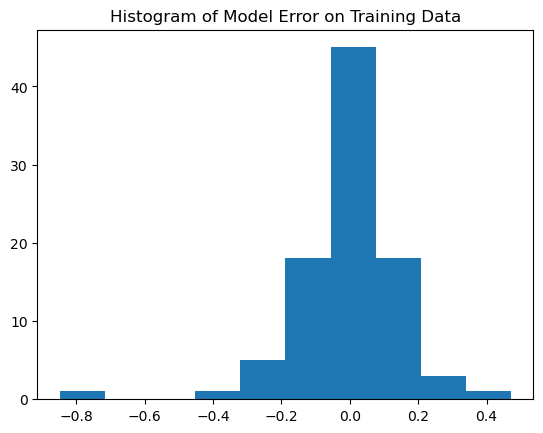

In [28]:
plt.hist(Y - predictions) #hist of Y minus Ypredictions, so Error
plt.title('Histogram of Model Error on Training Data')
#looks like a normal distribution, this is good

### The histogram of our model's error appears normally distributed. 

Text(0, 0.5, 'Log(Sale Price)')

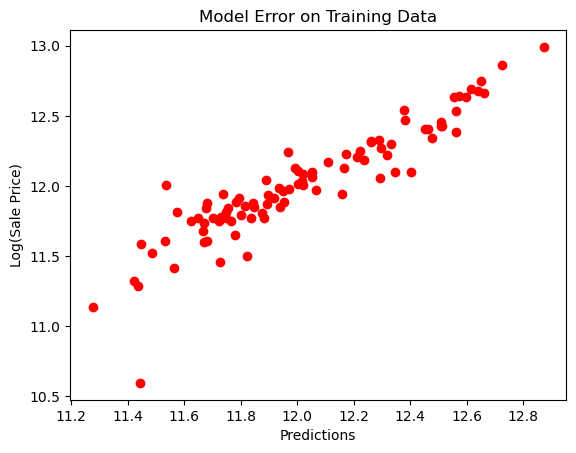

In [29]:
plt.scatter(predictions, Y, color='r')
plt.title('Model Error on Training Data')
plt.xlabel("Predictions")
plt.ylabel("Log(Sale Price)")
#pretty good, we want a straight line

### The scatterplot of our model's error shows a strong linear relationship between our model's predictions and the log(Sale Price). 
This means our model is a good fit to the data.

[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

Now that you have a prediction model, it's time to test your model against test data to confirm its accuracy on new data. The test data is located in the file `jtest.csv` 

What do you observe? Are these results in accordance with what you found earlier? How can you justify this?

In [30]:
#Now we will test different versions of the model on data it was not trained on, to see which variables give us a better R^2
test = pd.read_csv("C:/Users/mauri/Documents/Python Scripts/jtest.csv")

#Clean test data the same way we cleaned training data
test_nulls = test.isnull().sum()

drop_cols = []
counter = 0
#iterate over nulls
for i in test_nulls:
    if i > 10:
        drop_cols.append(test_nulls.index[counter]) #append col names where there are >10 null values to drop_cols list
    counter += 1
#iterate over drop_cols list
for col in drop_cols:
    test.drop(col, axis = 1, inplace=True) #drop columns

#Now we get rid of rows with NaN

drop_rows = []
counter = 0    
for i in test_nulls:
    if i > 0 and i <=10:
        drop_rows.append(test_nulls.index[counter]) #append col names where there are between 1 and 10 null values to drop_rows list
    counter += 1 

#reassign test, only including rows without null values
for row in drop_rows:
    test = test[test[row].notna()]

#check that columns and rows got dropped
test.isnull().sum()

#One Hot Encoding of categorical data
categorical_test = test.select_dtypes(include=[object])
#make a list of categorical column names
categorical_cols_test = list(categorical_test.columns)
# categorical_cols
#iterate over list of categorical columns, feed into one-hot encoding function
for col in categorical_cols_test:
    categorical_test = one_hot_encode(categorical_test, col)
    
test = test.join(categorical_test)

### Perform Linear Regression on test data

In [31]:
X = test[cols] #pull out desired columns from data_clean
Y = X['SalePrice']   #set Y = sale price column
X = X.drop(['SalePrice'], axis = 1) #get rid of sale price column in X
Y = np.log(Y) #log(sales price)

#Build linear regression model
#the linear_model.LinearRegression() class is used to instantiate the linear regression model so it can be implemented
lr = linear_model.LinearRegression()

#the fit() function fits the model according to the given training data
model = lr.fit(X,Y)

#the predict() function predicts class labels for samples in X
predictions = model.predict(X)
print(f'R^2 is: {model.score(X,Y)}')

R^2 is: 0.8703248860635275


### Our $R^2$ value of 0.87 means that approximately 87% of the variability in log(Sale Price) in the test dataset can be predicted by our model.

### This is a 12% improvement over the analysis Dr. Williams performed, which had an $R^2 = 0.74$. 
### This improvement can be explained by our application of the log-transformation to sales price, and our inclusion of 6 additional variables in the model. 

Text(0.5, 1.0, 'Histogram of Model Error on Test Data')

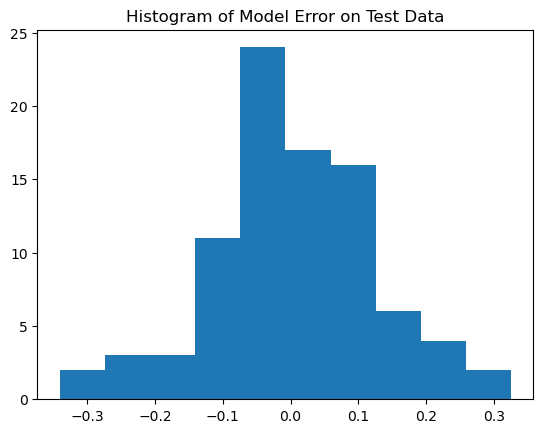

In [34]:
plt.hist(Y - predictions) #hist of Y minus Ypredictions, AKA Error
plt.title('Histogram of Model Error on Test Data')
#looks like a normall distribution, this is good

### The histogram of our model error is normally distributed.

Text(0, 0.5, 'Log(Sale Price)')

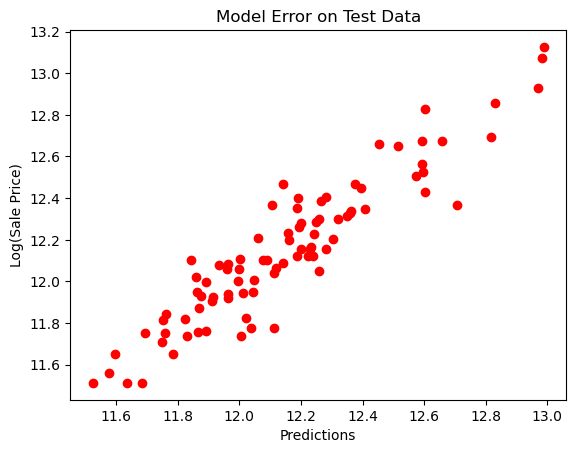

In [35]:
plt.scatter(predictions, Y, color='r')
plt.title("Model Error on Test Data")
plt.xlabel("Predictions")
plt.ylabel("Log(Sale Price)")

### The scatterplot of our model's error shows a strong linear relationship between our model's predictions and the log(Sale Price). 
### The model is a good fit to the test data.

[Back to top](#Index)

## Conclusion

In conclusion, this project aimed to predict housing sales prices using a multiple linear regression model with 11 independent variables, including both positively and negatively correlated variables, and using one-hot encoding to account for categorical data. The results of the analysis showed that the model performed well, with an R^2 of 0.85 on training data and 0.87 on test data.

Compared to the approach used by Dr. Williams, this project's approach proved to be more effective in terms of results. By using a more comprehensive set of independent variables, accounting for categorical data, and applying the log transformation of the sales price data, the multiple linear regression model was better equipped to explain the variation in housing sales prices.

Through this project, I learned that data analysis techniques are constantly evolving, and there is no one-size-fits-all approach to solving a problem. Data cleaning and preparation, variable selection, and model evaluation are all crucial steps in the data analysis process. By creating my own prediction model, I gained a better understanding of the importance of these steps and the impact they can have on the results.

Overall, this project demonstrated the power of multiple linear regression in predicting outcomes based on a set of independent variables. It also highlighted the importance of careful data preparation, variable selection, and model evaluation in obtaining accurate and useful results.

It is important to note that since we log-transformed the sale price, when using this model to predict house sale prices, one must transform the prediction from log(sale price) to sale price by taking the $log^-1(Prediction)$.




[Back to top](#Index
)
## References

- pandas.DataFrame.notna. "pandas documentation." pandas. Accessed March 29, 2023. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.notna.html.

- Python Graph Gallery. "Scatterplot with regression fit in Matplotlib." Accessed March 29, 2023. https://www.python-graph-gallery.com/scatterplot-with-regression-fit-in-matplotlib.

- Queiroz, Felipe. “One-hot encoding a feature on a Pandas DataFrame - an example.” Queirozf.com. Accessed March 29, 2023. https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example.

- Stack Overflow. “Pretty print an entire Pandas Series / DataFrame.” Stack Overflow. Last modified October 1, 2013. Accessed March 29, 2023. https://stackoverflow.com/questions/19124601/pretty-print-an-entire-pandas-series-dataframe.

- Stack Overflow. "Selecting Pandas columns by dtype." Stack Overflow. Last modified January 22, 2014. Accessed March 29, 2023. https://stackoverflow.com/questions/21271581/selecting-pandas-columns-by-dtype.
